Inspecting data from a manual inhibition paradigm

Clara Kuper, January 2021

In this task, one obeserver made radip hand movements from one point to another. In half of the trials, the upper and lower third of the screen turned white for 50ms. This "flash" occured 50 ms before the mean reaction time. This delay is known to elicit saccadic inhibition (a dip in the distribution of saccadic reaction times). We want to see if the same is true fo manual responses.

In this notebook, I will:

1. Load the data from the experiment
2. Look at the reaction time distributions from flash and no-flash conditions
3. Clean the reaction time data
4. Align the reaction times to the onset of the flash and check again for the distribution
5. Compare the flash and no flash condition statistically

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data_random = pd.read_csv('../1_Data/ck01_MI_dat.csv')
data_2t_5deg = pd.read_csv('../1_Data/ck02_MI_dat.csv')
data_2t_10deg = pd.read_csv('../1_Data/ck03_MI_dat.csv')
data_2t_10deg_em = pd.read_csv('../1_Data/ck04_MI_dat.csv')

data_2t_10deg_em

id  success  rea_time  clean_rea  mov_time  sacc_rea  sacc_dur  \
0      1        0  0.225151   0.166566  0.125446  0.166566  0.008347   
1      2        1  0.208560   0.166769  0.091754  0.166769  0.016736   
2      3        1  0.208545   0.158556  0.133442  0.158556  0.016582   
3      4        1  0.199718   0.166293  0.125505  0.166293  0.016671   
4      5        0  0.191805   0.158395  0.116974  0.158395  0.016699   
..   ...      ...       ...        ...       ...       ...       ...   
513  514        1  0.166634   0.166829  0.166914  0.166829  0.016381   
514  515        1  0.183254   0.166542  0.108547  0.166542  0.016879   
515  516        1  0.141987   0.166735  0.141548  0.166735  0.016646   
516  517        1  0.191629   0.124917  0.108523  0.124917  0.016709   
517  518        1  0.175288   0.158496  0.116681  0.158496  0.016991   

         initPixx       t_start       t1_draw  ...    t_movStart  \
0     9770.374053   9798.146839   9798.155845  ...   9799.806201   
1     9800.589468   9802.531107   9802.539342  ...   9803.939481   
2     9804.731091   9806.524613   9806.530916  ...   9807.714472   
3     9808.506127   9810.290197   9810.297648  ...   9811.606166   
4     9812.414546   9814.205123   9814.214351  ...   9815.381188   
..            ...           ...           ...  ...           ...   
513  11806.085537  11807.868818  11807.877044  ...  11809.018873   
514  11809.860682  11811.700354  11811.702059  ...  11812.810527   
515  11813.635825  11815.419960  11815.427079  ...  11816.594117   
516  11817.452444  11819.272498  11819.277135  ...  11820.577321   
517  11821.394004  11823.174267  11823.177321  ...  11824.394174   

         t_movEnd   t_saccStart     t_saccEnd    t_feedback         t_end  \
0     9799.931647   9799.747616   9799.755963   9800.589468   9800.589468   
1     9804.031235   9803.897689   9803.914425   9804.731091   9804.731091   
2     9807.847913   9807.664482   9807.681065   9808.506127   9808.506127   
3     9811.731671   9811.572741   9811.589412   9812.414546   9812.414546   
4     9815.498162   9815.347778   9815.364477   9816.189650   9816.189650   
..            ...           ...           ...           ...           ...   
513  11809.185787  11809.019069  11809.035449  11809.860682  11809.860682   
514  11812.919074  11812.793815  11812.810694  11813.635825  11813.635825   
515  11816.735665  11816.618864  11816.635510  11817.452444  11817.452444   
516  11820.685844  11820.510609  11820.527318  11821.394004  11821.394004   
517  11824.510855  11824.377382  11824.394373  11825.219183  11825.219183   

      mean_rt       touchX      touchY  version  
0    0.100000   633.902041  562.613480     2tar  
1    0.116566  1304.702041  557.991747     2tar  
2    0.116667   617.053061  551.059147     2tar  
3    0.113963  1312.073469  533.232462     2tar  
4    0.114546  1311.546939  541.815681     2tar  
..        ...          ...         ...      ...  
513  0.111959   612.840816  552.709766     2tar  
514  0.112010  1282.587755  546.107290     2tar  
515  0.112056  1276.269388  542.145805     2tar  
516  0.112104  1356.828571  535.873453     2tar  
517  0.111729  1299.963265  527.950481     2tar  

[518 rows x 25 columns]

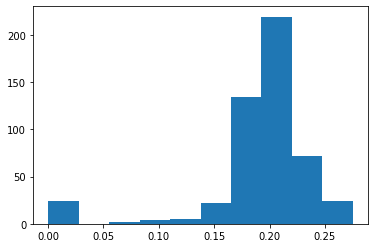

In [2]:
# normalize all times to the "go" signal of the task (t2_draw)
data = data_2t_10deg.copy()
data['initPixx'] = data['initPixx'] - data['t2_draw']
data['t_start'] = data['t_start'] - data['t2_draw']
data['t1_draw'] = data['t1_draw'] - data['t2_draw']
data['t2_draw'] = data['t2_draw'] - data['t2_draw']
data['t_fixed'] = data['t_fixed'] - data['t2_draw']
data['t_flash'] = data['t_flash'] - data['t2_draw']
data['t_movStart'] = data['t_movStart'] - data['t2_draw']
data['t_movEnd'] = data['t_movEnd'] - data['t2_draw']
data['t_feedback'] = data['t_feedback'] - data['t2_draw']
data['t_end'] = data['t_end'] - data['t2_draw']

plt.hist(data.rea_time);

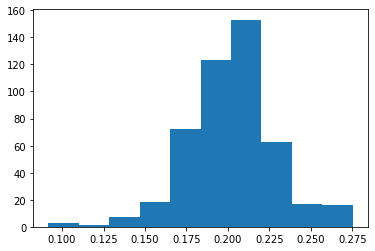

In [3]:
# clean the dataset: remove all time trials where the reaction time is larger or smaller than 2 std
# also, remove all unsuccessful trials
# get standart deviation
rea_std = np.std(data.rea_time)

# get std as variation from mean
rea_cut_high = np.mean(data.rea_time) + 2* rea_std
rea_cut_low = np.mean(data.rea_time) - 2* rea_std

# delete the rows with too low/high reaction times
rm_idx = np.where((data.rea_time >= rea_cut_high) | (data.rea_time <= rea_cut_low))
df = data.drop(rm_idx[0]).reset_index(drop = True)
# delete rows with unsuccessful trials
df = df.drop(np.where(df.success ==0)[0])
# plot all trials together
plt.hist(df.rea_time);

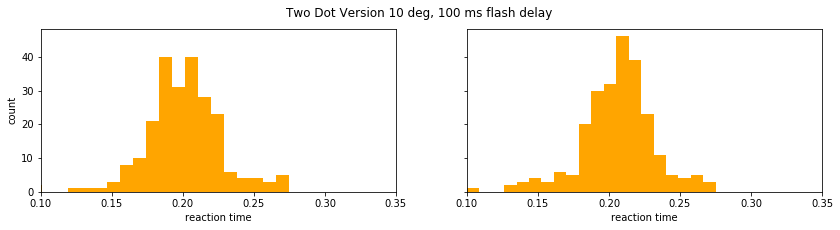

In [4]:
# plot reaction times of flash - and no-flash trials seperately
fig1, axs1 = plt.subplots(1,2, figsize  = (14,3), sharey = True)
fig1.suptitle('Two Dot Version 10 deg, 100 ms flash delay')
axs1[0].hist(df[np.isnan(df.t_flash)]['rea_time'], bins = 20, color = 'orange')
axs1[0].set_xlim(0.1,0.35)
axs1[0].set_xlabel('reaction time')
axs1[0].set_ylabel('count')
axs1[1].hist(df[np.isnan(df.t_flash)==False]['rea_time'], bins = 20, color = 'orange')
axs1[1].set_xlim(0.1,0.35)
axs1[1].set_xlabel('reaction time')

plt.savefig('../3_Figures/2Dot_10deg_100ms.png')

C:\Users\ClaraQ\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ClaraQ\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


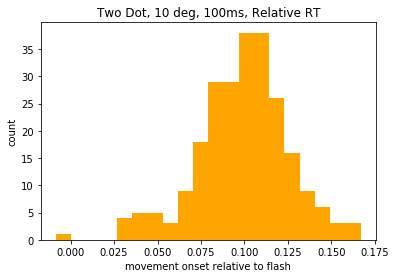

In [5]:
# This doesn't look like a dip, but maybe the problem is that the flash was not always presented 
# at the same time relative to the movement onset. Lets check that

df['flash_movement'] = df.t_movStart - df.t_flash
p = plt.hist(df.flash_movement, bins =20, color = 'orange')
plt.xlabel('movement onset relative to flash')
plt.ylabel('count')
plt.title('Two Dot, 10 deg, 100ms, Relative RT')

plt.savefig('../3_Figures/Relative_2Dot_10deg_100ms.png')

In [6]:
# So we can see that there is a distribution of reaction times, centeres ar 30-50 ms (which is what we were looking for)
# There are few negative times, which is good, bc it means that rarely was the flash shown after the hand already moved.
# We don't see a dip in the responses as we would expect at around 50 - 70 ms
# we can still compare if the reaction times differ between flash and no flash conditions
flash_trials = df[np.isnan(df.t_flash)==False]['rea_time']
no_flash_trials = df[np.isnan(df.t_flash)]['rea_time']

print(len(flash_trials))
print(len(no_flash_trials))

flash_trials = np.random.choice(flash_trials, len(no_flash_trials))

stats.ks_2samp(flash_trials,no_flash_trials)

242
231


Ks_2sampResult(statistic=0.1341991341991342, pvalue=0.03110043315144815)

Conclusion: we find no evidence for manual freezing in the response times. Let's have a look at the duration of the movement instead of the latency

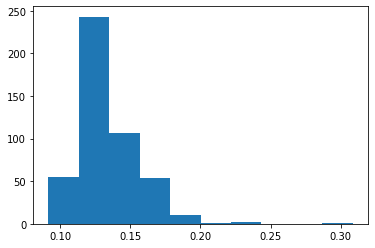

In [7]:
plt.hist(df.mov_time);

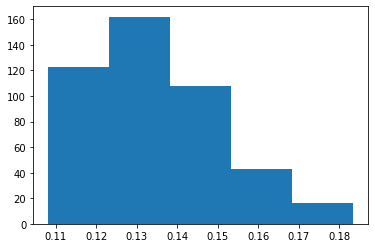

In [8]:
mov_std = np.std(df.mov_time)

# get std as variation from mean
mov_cut_high = np.mean(data.mov_time) + 2* mov_std
mov_cut_low = np.mean(data.mov_time) - 2* mov_std

# delete the rows with too low/high reaction times
rm_idx = np.where((data.mov_time >= mov_cut_high) | (data.mov_time <= mov_cut_low))
df = data.drop(rm_idx[0]).reset_index(drop = True)
# plot all trials together
plt.hist(df.mov_time, bins = 5);

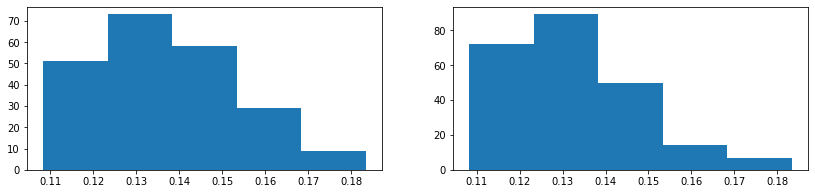

In [9]:
fig2, axs2 = plt.subplots(1,2, figsize = (14,3))
axs2[0].hist(df[np.isnan(df.t_flash)]['mov_time'], bins = 5)
axs2[1].hist(df[np.isnan(df.t_flash)==False]['mov_time'], bins = 5);

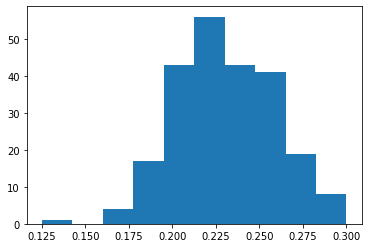

In [10]:
# correct the movement durations and show them realtive to flash onset 

mov_flash = df.t_movEnd - df.t_flash
mov_flash = mov_flash[mov_flash<0.5]
plt.hist(mov_flash);

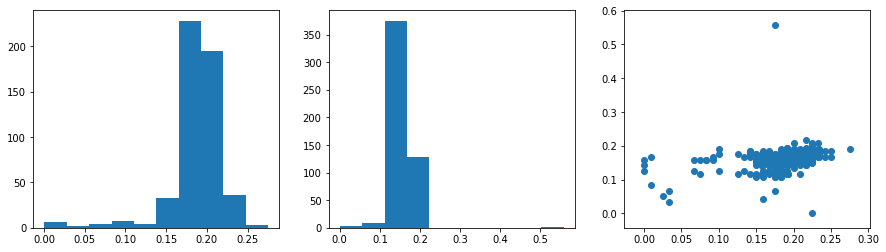

In [15]:
em_data = data_2t_10deg_em.copy()

# explore the eye movement and manual reaction times
# first: plot the distribution of eye and hand movements and the realtionship between them

fig3, axs3 = plt.subplots(1,3, figsize=(15,4))

axs3[0].hist(em_data.rea_time)
axs3[1].hist(em_data.sacc_rea)
axs3[2].scatter(em_data.rea_time,em_data.sacc_rea);

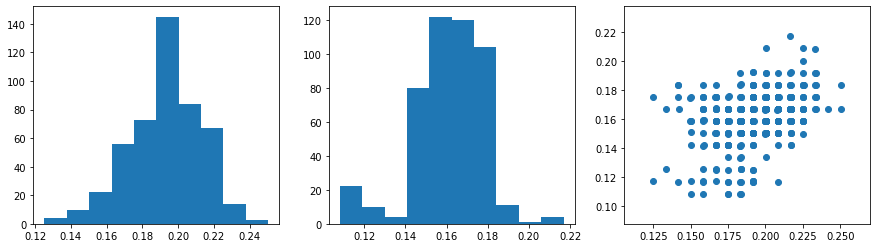

In [16]:
# lets clean this dataset
# clean the dataset: remove all time trials where the reaction time is larger or smaller than 2 std
# also, remove all unsuccessful trials
# get standart deviation
rea_std = np.std(em_data.rea_time)
sacc_std = np.std(em_data.sacc_rea)

# get std as variation from mean
rea_cut_high = np.mean(em_data.rea_time) + 2* rea_std
rea_cut_low = np.mean(em_data.rea_time) - 2* rea_std
sacc_cut_high = np.mean(em_data.sacc_rea) + 2* rea_std
sacc_cut_low = np.mean(em_data.sacc_rea) - 2* rea_std

# delete the rows with too low/high reaction times
rm_idx = np.where((((em_data.rea_time >= rea_cut_high) | (em_data.rea_time <= rea_cut_low))|(em_data.sacc_rea >= sacc_cut_high) )| (em_data.sacc_rea <= sacc_cut_low))
df = em_data.drop(rm_idx[0]).reset_index(drop = True)
# delete rows with unsuccessful trials
df = df.drop(np.where(df.success ==0)[0])
# plot all trials together
fig4, axs4 = plt.subplots(1,3, figsize=(15,4))

axs4[0].hist(df.rea_time)
axs4[1].hist(df.sacc_rea)
axs4[2].scatter(df.rea_time,df.sacc_rea);

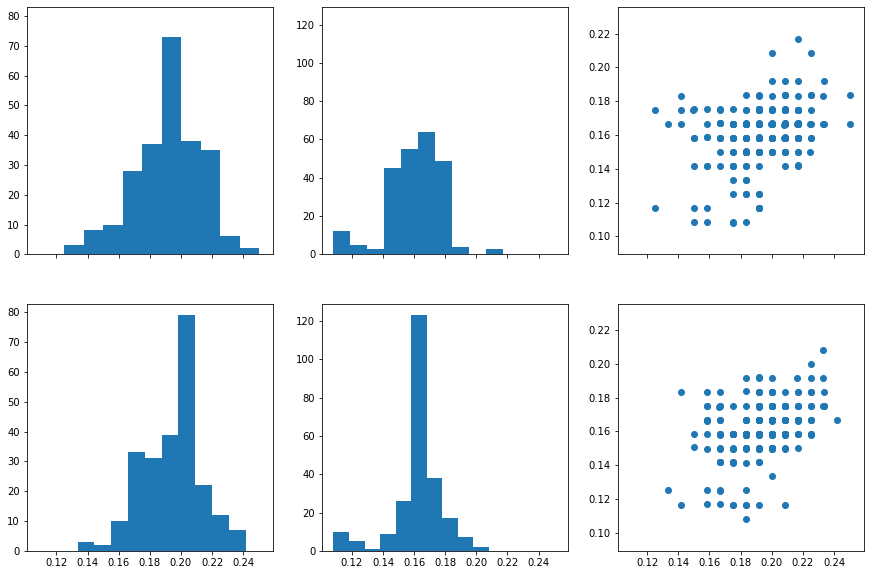

In [35]:
# let's see if we find differences in the distributions of flash and no-flash trials

flash_trials = np.isnan(df.t_flash)==False
no_flash_trials = np.isnan(df.t_flash)

fig5, axs5 = plt.subplots(2,3, figsize = (15,10), sharey = 'col', sharex = 'all')

axs5[0,0].hist(df[flash_trials]['rea_time'])
axs5[1,0].hist(df[no_flash_trials]['rea_time'])
axs5[0,2].scatter(df[flash_trials]['rea_time'],df[flash_trials]['sacc_rea'])

axs5[0,1].hist(df[flash_trials]['sacc_rea'])
axs5[1,1].hist(df[no_flash_trials]['sacc_rea'])
axs5[1,2].scatter(df[no_flash_trials]['rea_time'],df[no_flash_trials]['sacc_rea'])

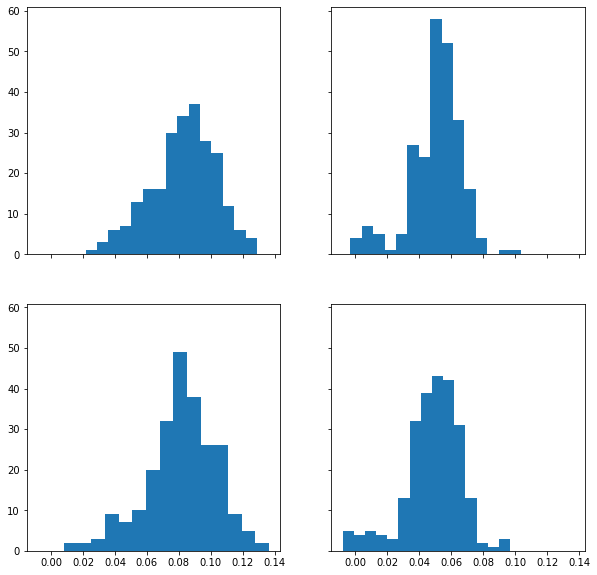

In [42]:
# express these values realtive to the flash onset
flash_on = df.t_flash[flash_trials] - df.t2_draw[flash_trials]

fig6, axs6 = plt.subplots(2,2, figsize = (10,10), sharex = True, sharey = True)

axs6[0,0].hist(df[no_flash_trials]['rea_time'] - df.mean_rt[no_flash_trials], bins =15)
axs6[0,1].hist(df[no_flash_trials]['sacc_rea'] - df.mean_rt[no_flash_trials], bins =15)
axs6[1,0].hist(df[flash_trials]['rea_time'] - df.mean_rt[flash_trials], bins =15)
axs6[1,1].hist(df[flash_trials]['sacc_rea'] - df.mean_rt[flash_trials], bins =15);

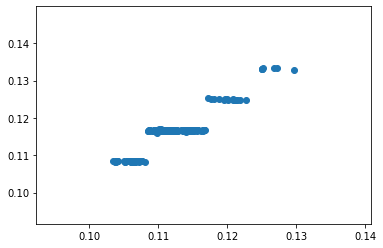

In [39]:
plt.scatter(df.mean_rt, (df.t_flash - df.t2_draw))

In [44]:
# final version: only eye movements, variable flash times
em_only = pd.read_csv('../1_Data/ck05_MI_dat.csv')
em_only

id  success  rea_time  clean_rea  mov_time  sacc_rea  sacc_dur  \
0      1        1       NaN   0.191593       NaN  0.191593  0.016696   
1      2        1       NaN   0.233457       NaN  0.233457  0.008378   
2      3        1       NaN   0.158171       NaN  0.158171  0.016656   
3      4        1       NaN   0.208136       NaN  0.208136  0.016682   
4      5        1       NaN   0.216810       NaN  0.216810  0.016580   
..   ...      ...       ...        ...       ...       ...       ...   
506  507        1       NaN   0.200125       NaN  0.200125  0.016751   
507  508        1       NaN   0.200092       NaN  0.200092  0.016673   
508  509        1       NaN   0.183425       NaN  0.183425  0.016740   
509  510        1       NaN   0.225120       NaN  0.225120  0.016675   
510  511        1       NaN   0.200077       NaN  0.200077  0.016626   

         initPixx       t_start       t1_draw  ...       t_flash  t_movStart  \
0    20043.011776  20061.269881  20061.276830  ...  20062.118583         NaN   
1    20063.093740  20064.999133  20065.001930  ...  20065.568703         NaN   
2    20066.518729  20068.306794  20068.310253  ...           NaN         NaN   
3    20070.035469  20071.817754  20071.826993  ...  20072.527057         NaN   
4    20073.468836  20075.255158  20075.260361  ...  20075.935437         NaN   
..            ...           ...           ...  ...           ...         ...   
506  21842.438605  21844.222680  21844.229966  ...  21844.955129         NaN   
507  21845.930262  21847.716288  21847.721671  ...  21848.838498         NaN   
508  21849.655227  21851.435020  21851.438398  ...  21852.396947         NaN   
509  21853.197202  21854.982798  21854.988412  ...           NaN         NaN   
510  21856.513714  21858.295444  21858.296796  ...           NaN         NaN   

     t_movEnd   t_saccStart     t_saccEnd    t_feedback         t_end  touchX  \
0         NaN  20062.276929  20062.293625  20063.093740  20063.093740     NaN   
1         NaN  20065.752035  20065.760413  20066.518729  20066.518729     NaN   
2         NaN  20069.185408  20069.202064  20070.035469  20070.035469     NaN   
3         NaN  20072.668709  20072.685391  20073.468836  20073.468836     NaN   
4         NaN  20076.085498  20076.102078  20076.868909  20076.868909     NaN   
..        ...           ...           ...           ...           ...     ...   
506       NaN  21845.130134  21845.146886  21845.930262  21845.930262     NaN   
507       NaN  21848.855113  21848.871786  21849.655227  21849.655227     NaN   
508       NaN  21852.380207  21852.396947  21853.197202  21853.197202     NaN   
509       NaN  21855.738601  21855.755277  21856.513714  21856.513714     NaN   
510       NaN  21859.255244  21859.271870  21860.055326  21860.055326     NaN   

     touchY  version  
0       NaN  em_only  
1       NaN  em_only  
2       NaN  em_only  
3       NaN  em_only  
4       NaN  em_only  
..      ...      ...  
506     NaN  em_only  
507     NaN  em_only  
508     NaN  em_only  
509     NaN  em_only  
510     NaN  em_only  

[511 rows x 24 columns]

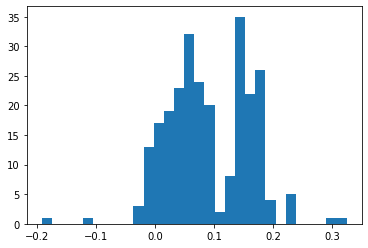

In [50]:
plt.hist(em_only.t_saccStart - em_only.t_flash, bins = 30);